---
title: "【脱初心者】Pandasのおしゃな書き方を目指して"
description: "Pandasの機能をもうちょっといい感じに使うために中級上級者になるため"
date: "2026-02-07"
categories: ["Python基礎", "Pandas"] 
jupyter: python3
---

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from modules.generate_data import generate_survey_data, generate_duplicate_example

In [33]:
# バージョンの確認
print(pd.__version__)

3.0.0


In [34]:
df = sns.load_dataset('titanic')
display(df.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [35]:
df_q = generate_survey_data(n=10)
display(df_q)

,ユーザーID,年齢,満足度,好きな食べ物
0,U001,45,3.0,[ラーメン]
1,U002,29,5.0,"[カレー, サラダ, パスタ]"
2,U003,34,NaN,"[ハンバーグ, カレー]"
3,U004,33,5.0,"[サラダ, カレー, 寿司]"
4,U005,22,4.0,"[サラダ, カレー, パスタ]"
5,U006,31,4.0,"[サラダ, カレー, ハンバーグ]"
6,U007,41,NaN,"[サラダ, 寿司, カレー]"
7,U008,31,4.0,"[カレー, サラダ, パスタ]"
8,U009,44,2.0,"[パスタ, 寿司]"
9,U010,26,3.0,[カレー]


In [36]:
# user_idで結合する多対多になるデータを用意
df_user, df_order = generate_duplicate_example()
display(df_user)
display(df_order)

,user_id,user_name
0,1,田中
1,2,佐藤_旧
2,2,佐藤_新
3,3,鈴木


,user_id,item,price
0,1,リンゴ,100
1,2,バナナ,200
2,2,メロン,300
3,4,ブドウ,400


In [37]:
data = {
    "カテゴリ": [],
    "コード": [],
    "用途": [],
    "使用データ": [],
}

def add_entry(category, code, purpose, used_data):
    data["カテゴリ"].append(category)
    data["コード"].append(code)
    data["用途"].append(purpose)
    data["使用データ"].append(used_data)

## データ読み込みと出力

In [38]:
add_entry(
    category="読込",
    code="pd.read_csv(path, chunksize=100, usecols=[...])",
    purpose="大容量のCSVファイルをメモリを節約しながら読み込む",
    used_data="titanic",
)

df_lst = []
chunks = pd.read_csv("./data/titanic.csv", chunksize=100, usecols=['survived', 'pclass', 'fare'])
for chunk in chunks:
    optimized_chunk = chunk.convert_dtypes()
    agged = optimized_chunk.groupby(['survived', 'pclass']).agg(
        fare=('fare', 'sum'),
        user=('fare', 'count')
    ).reset_index()
    df_lst.append(agged)
    
df_final = pd.concat(df_lst, ignore_index=True)
agged = df_final.groupby(['survived', 'pclass']).agg(
    fare=('fare', 'sum'),
    user=('user', 'sum')
)
agged["mean_fare"] = agged["fare"] / agged["user"]
display(agged)

fare  user  mean_fare
survived pclass                             
0        1        5174.7206    80  64.684007
         2        1882.9958    97  19.412328
         3        5085.0035   372  13.669364
1        1       13002.6919   136  95.608029
         2        1918.8459    87    22.0557
         3        1629.6916   119  13.694887

ちょっと蛇足化もしれないがメモリを節約することができる

In [39]:
# マークダウンで州つりょく

add_entry(
    category="出力",
    code="df.to_markdown('path')",
    purpose="データをマークダウン形式で出力する",
    used_data="titanic, survey, users, orders",
)


df.head(10).to_markdown("./data/titanic.md", index=False)
df_q.head(10).to_markdown("./data/survey.md", index=False)
df_user.head(10).to_markdown("./data/users.md", index=False)
df_order.head(10).to_markdown("./data/orders.md", index=False)
# df.to_csv("./data/titanic.csv", index=False)

In [40]:
add_entry(
    category="出力",
    code="df.style.background_gradient(path)",
    purpose="データをヒートマップで可視化する",
    used_data="titanic",
)

# 簡単なヒートマップはpanadsだけで可能
agged.style.background_gradient(cmap='Blues', subset=['mean_fare'])

## データ抽出

In [41]:
add_entry(
    category="抽出",
    code="df.nlargest(n=10, columns='fare')",
    purpose="指定したカラムのデータを大きい順に抽出する",
    used_data="titanic",
)

# 指定したカラムのデータを大きい順に抽出
df.nlargest(n=10, columns=['fare', "pclass"])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
742,1,1,female,21.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
118,0,1,male,24.0,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False


In [42]:
add_entry(
    category="抽出",
    code="df.nsmallest(n=10, columns='fare')",
    purpose="指定したカラムのデータを小さい順に抽出する",
    used_data="titanic",
)

# 小さい順に抽出
df.nsmallest(n=10, columns='fare')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
263,0,1,male,40.0,0,0,0.0,S,First,man,True,B,Southampton,no,True
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,NaN,Southampton,yes,True
277,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
413,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
466,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
481,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
597,0,3,male,49.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
633,0,1,male,NaN,0,0,0.0,S,First,man,True,NaN,Southampton,no,True


In [43]:
add_entry(
    category="抽出",
    code="df.select_dtypes(include='データタイプ')",
    purpose="特定のデータ型のカラムのみを抽出する",
    used_data="titanic",
)

# 型で抽出するデータを選べる
numbers = df.select_dtypes(include='number')
display(numbers.head())

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


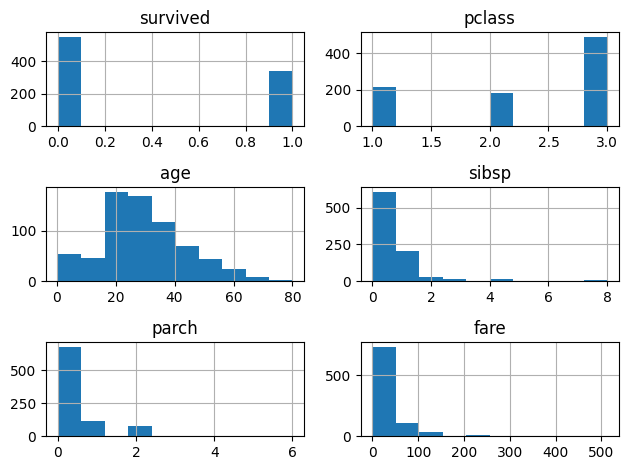

In [44]:
numbers.hist()
plt.tight_layout()

## データ型

In [45]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


In [46]:
add_entry(
    category="データ型",
    code="convert_dtypes()",
    purpose="データ型を柔軟に変換する",
    used_data="titanic",
)

# 柔軟な型に変換してくれる
df.convert_dtypes().info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    Int64   
 1   pclass       891 non-null    Int64   
 2   sex          891 non-null    string  
 3   age          714 non-null    Float64 
 4   sibsp        891 non-null    Int64   
 5   parch        891 non-null    Int64   
 6   fare         891 non-null    Float64 
 7   embarked     889 non-null    string  
 8   class        891 non-null    category
 9   who          891 non-null    string  
 10  adult_male   891 non-null    boolean 
 11  deck         203 non-null    category
 12  embark_town  889 non-null    string  
 13  alive        891 non-null    string  
 14  alone        891 non-null    boolean 
dtypes: Float64(2), Int64(4), boolean(2), category(2), string(5)
memory usage: 87.6 KB


In [47]:
# 特定の型を変換しないように指定も可能
df.convert_dtypes(
    convert_integer=False,
    convert_boolean=False,
    convert_floating=False,
    convert_string=True,
).info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    string  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    string  
 8   class        891 non-null    category
 9   who          891 non-null    string  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    string  
 13  alive        891 non-null    string  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), string(5)
memory usage: 80.7 KB


## 整形

In [48]:
# 年齢をビン分割してカテゴリ変数に変換

add_entry(
    category="整形",
    code="pd.cut(Series, bins=[], labels=[])",
    purpose="範囲を指定して数値データをカテゴリ変数に変換する",
    used_data="titanic",
)

df["age_group"] = pd.cut(
    df["age"], 
    bins=[0, 12, 20, 40, 60, 80, np.inf], 
    labels=["child", "teen", "adult", "middle_aged", "senior", "elderly"],
    
)
df[["age", "age_group"]].head(10)

,age,age_group
0,22.0,adult
1,38.0,adult
2,26.0,adult
3,35.0,adult
4,35.0,adult
5,NaN,NaN
6,54.0,middle_aged
7,2.0,child
8,27.0,adult
9,14.0,teen


In [49]:
df.query("0 <= age <= 12")["age_group"].unique()

['child']
Categories (6, str): ['child' < 'teen' < 'adult' < 'middle_aged' < 'senior' < 'elderly']

カテゴリ変数となり順序の大小が確保される

In [50]:
add_entry(
    category="整形",
    code="pd.qcut(Series, q=4, labels=[])",
    purpose="分割数を決めて数値データをカテゴリ変数に変換する",
    used_data="titanic",
)

# 料金を4分割してカテゴリ変数に変換
df["fare_rank"] = pd.qcut(df["fare"], q=4, labels=["low", "medium", "high", "very_high"])
df[["fare", "fare_rank"]]

,fare,fare_rank
0,7.2500,low
1,71.2833,very_high
2,7.9250,medium
3,53.1000,very_high
4,8.0500,medium
...,...,...
886,13.0000,medium
887,30.0000,high
888,23.4500,high
889,30.0000,high


In [51]:
df_q

,ユーザーID,年齢,満足度,好きな食べ物
0,U001,45,3.0,[ラーメン]
1,U002,29,5.0,"[カレー, サラダ, パスタ]"
2,U003,34,NaN,"[ハンバーグ, カレー]"
3,U004,33,5.0,"[サラダ, カレー, 寿司]"
4,U005,22,4.0,"[サラダ, カレー, パスタ]"
5,U006,31,4.0,"[サラダ, カレー, ハンバーグ]"
6,U007,41,NaN,"[サラダ, 寿司, カレー]"
7,U008,31,4.0,"[カレー, サラダ, パスタ]"
8,U009,44,2.0,"[パスタ, 寿司]"
9,U010,26,3.0,[カレー]


In [52]:
add_entry(
    category="整形",
    code="df.explode(column_name)",
    purpose="リスト型のデータを展開して縦長にする",
    used_data="survey",
)

# explodeメソッドでリストを展開
df_q_exploded = df_q.explode(["好きな食べ物"]).reset_index(drop=True)
df_q_exploded

,ユーザーID,年齢,満足度,好きな食べ物
0,U001,45,3.0,ラーメン
1,U002,29,5.0,カレー
2,U002,29,5.0,サラダ
3,U002,29,5.0,パスタ
4,U003,34,NaN,ハンバーグ
5,U003,34,NaN,カレー
6,U004,33,5.0,サラダ
7,U004,33,5.0,カレー
8,U004,33,5.0,寿司
9,U005,22,4.0,サラダ


複数列の同時展開はリスト内の要素数が同じじゃないとできない。

ついでにstack, unstack, meltも見てみる
  
* stackは横長のデータを縦長に積み上げる(インデックスが設定されている)
* meltも横長のデータを縦長に積み上げる(特定の列を指定して固定し、そのほかを縦に変換)
* unstackは縦長のデータを横長にする
* pivotは列の値を新しい列名にする（重複無し）
* pivot_tableはpivotに集計をプラスする

In [53]:
add_entry(
    category="整形",
    code="df.explode(column_name)",
    purpose="リスト型のデータを展開して縦長にする",
    used_data="titanic",
)

df_single_columns = df[["embark_town", "fare"]]
df_single_columns.stack(level=-1).reset_index().head(10)

,level_0,level_1,0
0,0,embark_town,Southampton
1,0,fare,7.25
2,1,embark_town,Cherbourg
3,1,fare,71.2833
4,2,embark_town,Southampton
5,2,fare,7.925
6,3,embark_town,Southampton
7,3,fare,53.1
8,4,embark_town,Southampton
9,4,fare,8.05


In [54]:
agged = (
    df.groupby(["class"])
    .agg(
        average_fare=pd.NamedAgg(column="fare", aggfunc="mean"),
        max_fare=pd.NamedAgg(column="fare", aggfunc="max"),
        min_fare=pd.NamedAgg(column="fare", aggfunc="min"),
        avg_age=pd.NamedAgg(column="age", aggfunc="mean"),
        sruvived_rate=pd.NamedAgg(column="survived", aggfunc="mean"),
    )
)
agged

,average_fare,max_fare,min_fare,avg_age,sruvived_rate
class,,,,,
First,84.154687,512.3292,0.0,38.233441,0.629630
Second,20.662183,73.5000,0.0,29.877630,0.472826
Third,13.675550,69.5500,0.0,25.140620,0.242363


In [55]:
stack_se = agged.stack(level=0)
stack_se

class                
First   average_fare      84.154687
        max_fare         512.329200
        min_fare           0.000000
        avg_age           38.233441
        sruvived_rate      0.629630
Second  average_fare      20.662183
        max_fare          73.500000
        min_fare           0.000000
        avg_age           29.877630
        sruvived_rate      0.472826
Third   average_fare      13.675550
        max_fare          69.550000
        min_fare           0.000000
        avg_age           25.140620
        sruvived_rate      0.242363
dtype: float64

In [56]:
stack_se.reset_index()

,class,level_1,0
0,First,average_fare,84.154687
1,First,max_fare,512.329200
2,First,min_fare,0.000000
3,First,avg_age,38.233441
4,First,sruvived_rate,0.629630
5,Second,average_fare,20.662183
6,Second,max_fare,73.500000
7,Second,min_fare,0.000000
8,Second,avg_age,29.877630
9,Second,sruvived_rate,0.472826


横長になった集計値を確認するにはちょうどよさそう。  

In [57]:
stack_se.index

MultiIndex([( 'First',  'average_fare'),
            ( 'First',      'max_fare'),
            ( 'First',      'min_fare'),
            ( 'First',       'avg_age'),
            ( 'First', 'sruvived_rate'),
            ('Second',  'average_fare'),
            ('Second',      'max_fare'),
            ('Second',      'min_fare'),
            ('Second',       'avg_age'),
            ('Second', 'sruvived_rate'),
            ( 'Third',  'average_fare'),
            ( 'Third',      'max_fare'),
            ( 'Third',      'min_fare'),
            ( 'Third',       'avg_age'),
            ( 'Third', 'sruvived_rate')],
           names=['class', None])

In [58]:
# stackで積み上げられたものはunstackで元に戻せる
unstacked = stack_se.unstack(level=1)
unstacked

,average_fare,max_fare,min_fare,avg_age,sruvived_rate
class,,,,,
First,84.154687,512.3292,0.0,38.233441,0.629630
Second,20.662183,73.5000,0.0,29.877630,0.472826
Third,13.675550,69.5500,0.0,25.140620,0.242363


In [59]:
add_entry(
    category="整形",
    code="df.melt(id_vars=[], var_name='', value_name='')",
    purpose="データを横長から縦長に変換する",
    used_data="titanic",
)

# meltメソッドで縦に長いデータに変換
df_agged = agged.reset_index()
df_agged.melt(id_vars=["class"], var_name="指標", value_name="値")

,class,指標,値
0,First,average_fare,84.154687
1,Second,average_fare,20.662183
2,Third,average_fare,13.675550
3,First,max_fare,512.329200
4,Second,max_fare,73.500000
5,Third,max_fare,69.550000
6,First,min_fare,0.000000
7,Second,min_fare,0.000000
8,Third,min_fare,0.000000
9,First,avg_age,38.233441


## 

## 結合の安全性

In [60]:
display(df_user)
display(df_order)

,user_id,user_name
0,1,田中
1,2,佐藤_旧
2,2,佐藤_新
3,3,鈴木


,user_id,item,price
0,1,リンゴ,100
1,2,バナナ,200
2,2,メロン,300
3,4,ブドウ,400


In [61]:
# 普通にマージすると気づかずしてしまう。
df_merged = pd.merge(df_user, df_order, on='user_id', how='inner')
display(df_merged)

,user_id,user_name,item,price
0,1,田中,リンゴ,100
1,2,佐藤_旧,バナナ,200
2,2,佐藤_旧,メロン,300
3,2,佐藤_新,バナナ,200
4,2,佐藤_新,メロン,300


In [62]:
add_entry(
    category="結合",
    code="df.merge(other_df, on='column_name', how='inner', validate='one_to_many')",
    purpose="結合前にデータの関係性を検証する",
    used_data="users, orders",
)

df_merged = pd.merge(
    df_user, 
    df_order,
    on='user_id',
    how='inner',
    validate='one_to_many' # これを追加
)
display(df_merged)

MergeError: Merge keys are not unique in left dataset; not a one-to-many merge
Duplicates in left:
  user_id
       2 ...

エラーをはいてくれるので結合前に対策ができる

## チェーンメソッド

In [63]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [64]:
# こんな感じのやつ
df_preprocessed = (
    df[["survived", "pclass", "age", "fare"]]
    .dropna(subset=['age', 'fare'])
    .convert_dtypes()
)
df_preprocessed

,survived,pclass,age,fare
0,0,3,22.0,7.25
1,1,1,38.0,71.2833
2,1,3,26.0,7.925
3,1,1,35.0,53.1
4,0,3,35.0,8.05
...,...,...,...,...
885,0,3,39.0,29.125
886,0,2,27.0,13.0
887,1,1,19.0,30.0
889,1,1,26.0,30.0


assignとpipを使えば複雑なものもチェーンメソッドに書ける

In [65]:
def add_tax(df, tax_rate=0.1):
    df_copy = df.copy()
    df_copy['fare_with_tax'] = df_copy['fare'] * (1 + tax_rate)
    return df_copy

def hoge(df):
    return 1

In [71]:
add_entry(
    category="チェーンメソッド",
    code="df.assign(...)",
    purpose="チェーンメソッドで新しい列を追加する",
    used_data="titanic",
)

add_entry(
    category="チェーンメソッド",
    code="df.pipe(...)",
    purpose="チェーンメソッドで関数を適用する",
    used_data="titanic",
)


df_preprocessed = (
    df[["survived", "pclass", "age", "fare"]]
    .dropna(subset=['age', 'fare'])
    .convert_dtypes()
    .assign(age_group=lambda x: pd.cut(x["age"], bins=[0, 12, 20, 40, 60, 80], labels=["child", "teen", "adult", "middle_aged", "senior"]))
    .pipe(add_tax, tax_rate=0.1)
)
df_preprocessed

,survived,pclass,age,fare,age_group,fare_with_tax
0,0,3,22.0,7.25,adult,7.975
1,1,1,38.0,71.2833,adult,78.41163
2,1,3,26.0,7.925,adult,8.7175
3,1,1,35.0,53.1,adult,58.41
4,0,3,35.0,8.05,adult,8.855
...,...,...,...,...,...,...
885,0,3,39.0,29.125,adult,32.0375
886,0,2,27.0,13.0,adult,14.3
887,1,1,19.0,30.0,teen,33.0
889,1,1,26.0,30.0,adult,33.0


In [78]:
# Pandas3.0からこうも書ける
tax_logic = pd.col("fare_with_tax") - pd.col("fare") # 計算ロジックを定義
df_preprocessed = (
    df[["survived", "pclass", "age", "fare"]]
    .dropna(subset=['age', 'fare'])
    .convert_dtypes()
    .assign(age_group=lambda x: pd.cut(x["age"], bins=[0, 12, 20, 40, 60, 80], labels=["child", "teen", "adult", "middle_aged", "senior"]))
    .pipe(add_tax, tax_rate=0.1)
    .assign(tax=tax_logic) # assign内でチェーンメソッドとして書ける
)
df_preprocessed

,survived,pclass,age,fare,age_group,fare_with_tax,tax
0,0,3,22.0,7.25,adult,7.975,0.725
1,1,1,38.0,71.2833,adult,78.41163,7.12833
2,1,3,26.0,7.925,adult,8.7175,0.7925
3,1,1,35.0,53.1,adult,58.41,5.31
4,0,3,35.0,8.05,adult,8.855,0.805
...,...,...,...,...,...,...,...
885,0,3,39.0,29.125,adult,32.0375,2.9125
886,0,2,27.0,13.0,adult,14.3,1.3
887,1,1,19.0,30.0,teen,33.0,3.0
889,1,1,26.0,30.0,adult,33.0,3.0
